# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.003
-0.002
-0.002
-0.003
-0.003
0.0
0.0
-0.002
-0.001
0.977
0.979
0.981
0.979
0.979
1.961
1.961
1.96
1.96
2.936
2.939
2.941
2.94
2.94
3.924
3.924
3.924
3.923
4.899
4.902
4.903
4.902
4.902
5.84
5.839
5.838
5.837
6.778
6.777
6.775
6.776
7.75
7.753
7.755
7.754
7.753
8.727
8.73
8.732
8.73
8.731
9.705
9.709
9.71
9.71
9.71
10.688
10.688
10.688
10.687
11.662
11.665
11.667
11.666
11.666
12.641
12.643
12.646
12.645
12.645
13.327
13.331
13.333
13.332
13.331
14.009
14.012
14.013
14.012
14.012
14.012
14.995
14.994
14.994
15.97
15.972
15.974
15.974
15.973
16.959
16.958
16.957
16.957
17.937
17.937
17.937
17.937
18.918
18.918
18.917
18.917
19.922
19.922
19.922
20.525
20.525
20.525
21.126
21.125
21.124
21.124
22.109
22.109
22.107
22.108
23.087
23.085
23.085
23.084
24.066
24.065
24.065
24.065
25.047
25.047
25.045
25.045
26.026

56.745
56.745
56.743
56.743
56.743
56.743
56.743
56.769
56.801
56.833
56.865
56.895
56.895
56.893
56.893
56.893
56.893
56.893
56.91
56.91
56.91
56.909
56.909
56.908
56.908
56.908
56.907
56.906
56.909
56.908
56.908
56.908
56.908
56.908
56.906
56.906
56.905
56.906
56.906
56.906
56.906
56.906
56.905
56.906
56.905
56.905
56.904
56.904
56.904
56.905
56.905
56.905
56.905
56.905
56.905
56.905
56.902
56.902
56.902
56.903
56.902
56.984
57.011
57.011
57.012
57.012
57.011
57.011
57.011
57.011
57.02
57.021
57.021
57.021
57.021
57.021
57.02
57.02
57.019
57.022
57.022
57.021
57.021
57.02
57.02
57.02
57.02
57.018
57.018
57.018
57.018
57.018
57.018
57.017
57.017
57.017
57.017
57.017
57.017
57.017
57.017
57.017
57.017
57.017
57.016
57.016
57.016
57.016
57.017
57.017
57.017
57.017
57.016
57.014
57.014
57.014
57.015
57.043
57.078
57.112
57.148
57.185
57.222
57.222
57.261
57.292
57.291
57.291
57.291
57.291
57.289
57.289
57.289
57.289
57.289
57.289
57.289
57.289
57.296
57.296
57.296
57.297
57.297
57.296
57

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.001
3,6,0.000
4,8,0.000
...,...,...
1502,3004,59.628
1503,3006,59.628
1504,3008,59.628
1505,3010,59.628


<IPython.core.display.Javascript object>


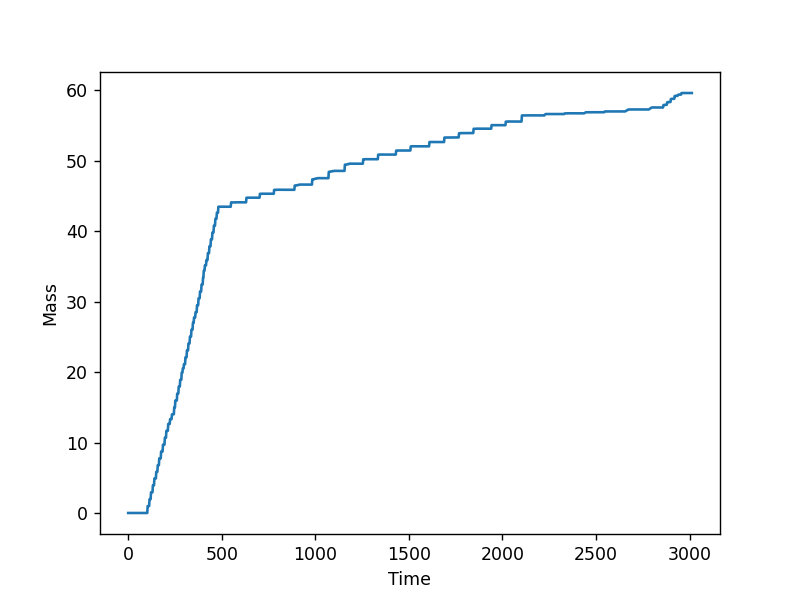

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_140223_S133-138.csv')